**1.导入需要的库**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin #对两个序列中的点进行距离匹配的函数
from sklearn.datasets import load_sample_image #导入图片数据所用的库
from sklearn.utils import shuffle #打乱有序的序列

**2.导入数据，探索数据**

In [2]:
china = load_sample_image('china.jpg')
china #数组

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [3]:
#查看数据类型，一种图片类型
china.dtype

dtype('uint8')

In [4]:
china.shape #长度，宽度，像素：三个数决定的颜色

(427, 640, 3)

In [5]:
china[0][0] #三个特征决定的一个颜色

array([174, 201, 231], dtype=uint8)

In [6]:
#包含多少种不同的颜色
newimage = china.reshape((427*640,3))
newimage.shape #273280个颜色的值（有重复）

(273280, 3)

In [7]:
pd.DataFrame(newimage).drop_duplicates().shape #共96615种颜色

(96615, 3)

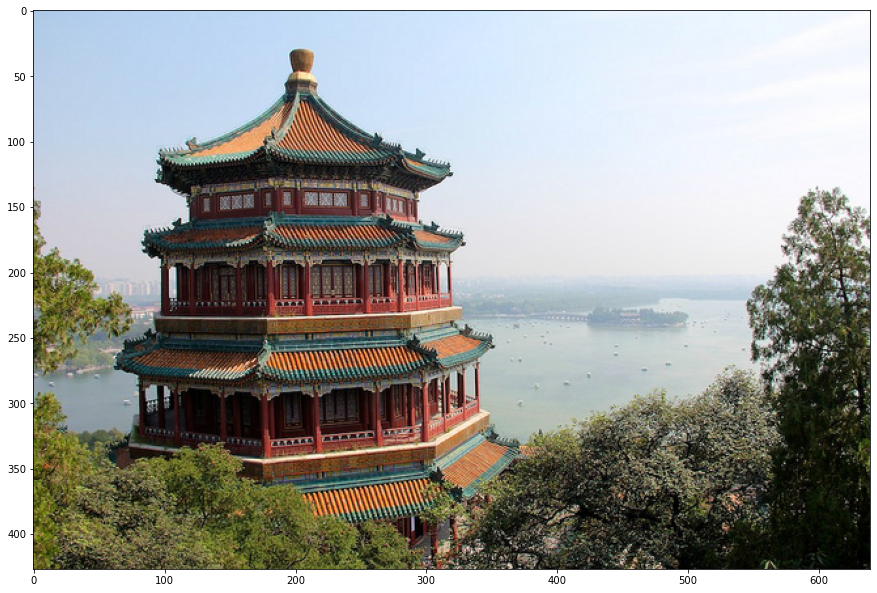

In [8]:
#图像可视化
plt.figure(figsize=(15,15))
plt.imshow(china) #导入3维数组形成的图片

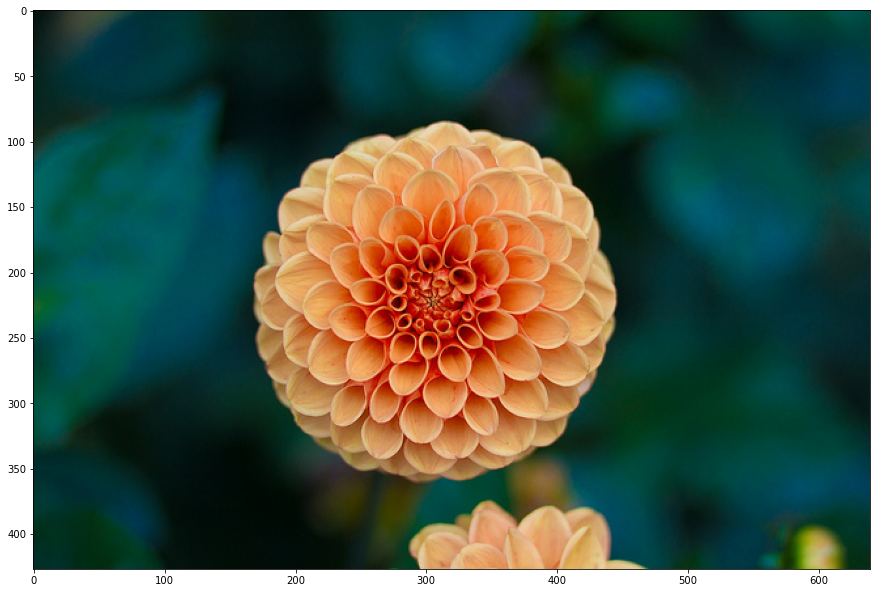

In [9]:
#插播另一张图片
flower = load_sample_image('flower.jpg')
plt.figure(figsize=(15,15))
plt.imshow(flower) #导入3维数组形成的图片

使用K-Means将颜色压缩到64种，且不严重损耗图像的质量。为此，要使用K-Means来将9W种颜色聚类成64类，然后使用64个簇的质心来替代全部的9W种颜色。为了比较，还要画出**随机**压缩到64种颜色的矢量量化图像，这就需要随机选取64个样本点作为随机质心，计算原数据中每个样本到它们的距离来找出离每个样本最近的随机质心，然后用每个样本所对应的随机质心来替换原本的样本。两种状况下，我们观察图像可视化之后的状况，以查看图片信息的损失。

**3.决定超参数，数据预处理**

（1）归一化处理

In [10]:
china = np.array(china, dtype=np.float64)/china.max()
(china<0).sum()

0

In [11]:
(china>1).sum()

0

（2）把china从图像格式，转换成矩阵格式

In [12]:
w,h,d = original_shape = tuple(china.shape)
w

427

In [13]:
h

640

In [14]:
d

3

In [15]:
assert d == 3 #如果d不为3就报错

In [16]:
image_array = np.reshape(china,(w*h,d)) #reshape改变结构（改变结构的对象,要改变的新结构）

**4.对数据进行K-Means的矢量量化**

In [17]:
n_clusters = 64
image_array_sample = shuffle(image_array, random_state=0)[:1000] #打乱并随机抽取一部分数据拟合
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_ #64个质心

array([[0.62570806, 0.60261438, 0.53028322],
       [0.15546218, 0.1557423 , 0.12829132],
       [0.82063983, 0.89896801, 0.98462332],
       [0.42039216, 0.43843137, 0.2227451 ],
       [0.69527105, 0.74994233, 0.76516724],
       [0.92174422, 0.9556336 , 0.99514194],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.28205128, 0.26395173, 0.19638009],
       [0.46509804, 0.43372549, 0.36901961],
       [0.71328976, 0.41960784, 0.31851852],
       [0.83529412, 0.86349206, 0.89505135],
       [0.76068627, 0.85617647, 0.9604902 ],
       [0.36372549, 0.36830065, 0.31405229],
       [0.34509804, 0.1654902 , 0.12901961],
       [0.53448674, 0.53264129, 0.50657439],
       [0.15098039, 0.24444444, 0.25228758],
       [0.56764706, 0.61993464, 0.6369281 ],
       [0.89411765, 0.63764706, 0.43529412],
       [0.58823529, 0.5630719 , 0.40588235],
       [0.60392157, 0.30326797, 0.25882353],
       [0.50784314, 0.31568627, 0.17908497],
       [0.0310856 , 0.0288857 , 0.01759923],
       [0.

In [18]:
labels = kmeans.predict(image_array) #按照已存在的质心对所有数据进行聚类

In [19]:
labels #每个样本点对应的簇

array([62, 62, 62, ...,  1,  6,  6])

In [20]:
set(labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63}

In [21]:
labels.shape

(273280,)

In [22]:
image_kmeans = image_array.copy()

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]] #用质心替换所有样本
image_kmeans.shape

(273280, 3)

In [23]:
pd.DataFrame(image_kmeans).drop_duplicates().shape #只剩64种颜色

(64, 3)

In [24]:
image_kmeans = image_kmeans.reshape(w,h,d) #恢复结构
image_kmeans.shape

(427, 640, 3)

**5.对数据进行随机的矢量量化**

In [25]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters] #随机抽取质心
centroid_random

array([[0.92156863, 0.9254902 , 0.94509804],
       [0.37647059, 0.37647059, 0.14117647],
       [0.48235294, 0.42745098, 0.41568627],
       [0.81960784, 0.81568627, 0.84705882],
       [0.98823529, 0.98823529, 0.98823529],
       [0.41568627, 0.16470588, 0.16862745],
       [0.94901961, 0.94901961, 0.95686275],
       [0.87843137, 0.92941176, 0.99215686],
       [0.24313725, 0.32156863, 0.17647059],
       [0.80784314, 0.88627451, 0.98039216],
       [0.07843137, 0.12941176, 0.01960784],
       [0.84705882, 0.91372549, 0.97647059],
       [0.75686275, 0.82745098, 0.91372549],
       [0.04313725, 0.04313725, 0.04313725],
       [0.38823529, 0.36470588, 0.23137255],
       [0.1254902 , 0.05490196, 0.05490196],
       [0.85490196, 0.92156863, 1.        ],
       [0.61568627, 0.58823529, 0.42352941],
       [0.80784314, 0.89411765, 0.98823529],
       [0.70196078, 0.75686275, 0.75686275],
       [0.86666667, 0.92941176, 0.98823529],
       [0.76078431, 0.81568627, 0.85882353],
       [0.

In [26]:
#pairwise_distances_argmin(x1,x2,axis)：计算x2中的每个样本到x1中的每个样本的距离，并返回与x2相同形状的、与x1中样本的最近样本的索引
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random

array([55, 55, 55, ..., 52, 60, 60], dtype=int64)

In [27]:
len(set(labels_random))

64

In [28]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

**6.将原图按K-Means矢量量化和随机矢量量化的图像绘制出来**

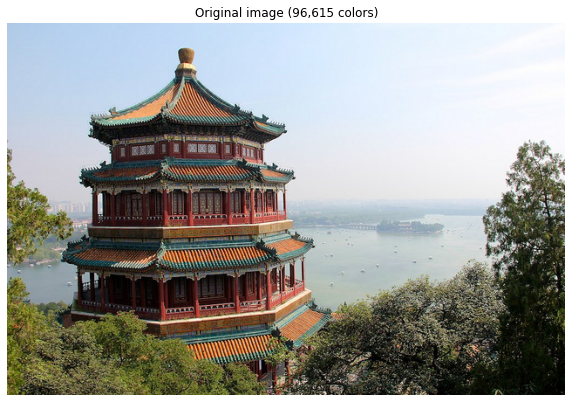

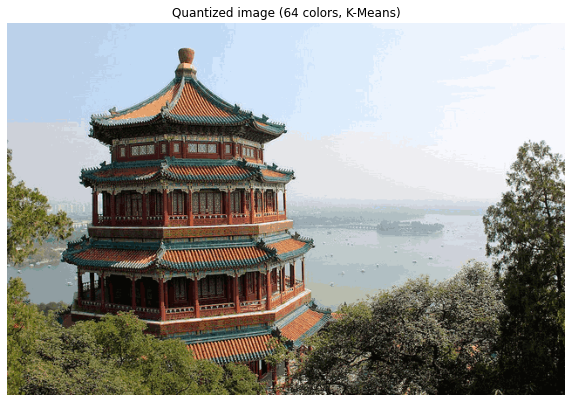

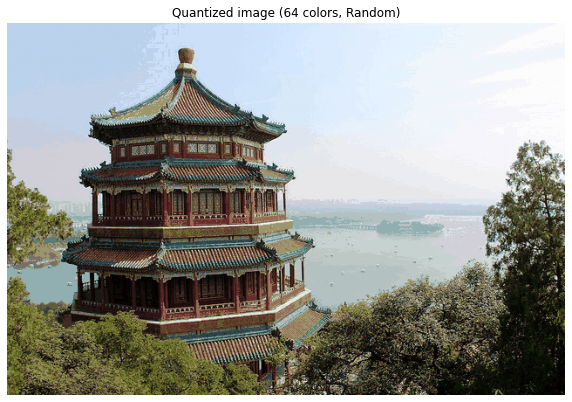

In [29]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()

**附录**

（1）assert用法

assert 表达式 [,参数]<br>
当表达式为真时，程序继续往下执行；<br>
当表达式为假时，抛出AssertionError错误，并将**参数**输出。

d_ = 5<br>
assert d_ == 3, "一个格子中的特征数目不等于3"

（2）reshape用法：无论有几维，只要维度之间相乘后的总数据量不变，维度可以随意变换

In [30]:
#插播reshape用法
a = np.random.random((2,4))
a

array([[0.82166512, 0.04553361, 0.75242673, 0.86081246],
       [0.77663339, 0.47743905, 0.6207418 , 0.48664344]])

In [31]:
a.shape

(2, 4)

In [32]:
a.reshape((4,2))

array([[0.82166512, 0.04553361],
       [0.75242673, 0.86081246],
       [0.77663339, 0.47743905],
       [0.6207418 , 0.48664344]])

In [33]:
a.reshape((4,2)).shape

(4, 2)

In [34]:
np.reshape(a,(4,2))

array([[0.82166512, 0.04553361],
       [0.75242673, 0.86081246],
       [0.77663339, 0.47743905],
       [0.6207418 , 0.48664344]])

In [35]:
np.reshape(a,(4,2)).shape

(4, 2)

In [36]:
np.reshape(a,(2,2,2))

array([[[0.82166512, 0.04553361],
        [0.75242673, 0.86081246]],

       [[0.77663339, 0.47743905],
        [0.6207418 , 0.48664344]]])

In [37]:
np.reshape(a,(2,2,2)).shape

(2, 2, 2)